In [1]:
# python version
!python --version

Python 3.9.7


In [2]:
# dependecies
!pip freeze

appnope==0.1.2
backcall==0.2.0
cycler==0.10.0
debugpy==1.5.1
decorator==5.1.0
entrypoints==0.3
imageio==2.9.0
ipykernel==6.5.0
ipython==7.29.0
jedi==0.18.0
jupyter-client==7.0.6
jupyter-core==4.9.1
kiwisolver==1.3.2
matplotlib==3.4.3
matplotlib-inline==0.1.3
nest-asyncio==1.5.1
networkx==2.6.3
numpy==1.21.2
opencv-python==4.5.3.56
parso==0.8.2
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.3.2
prompt-toolkit==3.0.22
ptyprocess==0.7.0
Pygments==2.10.0
pyparsing==2.4.7
python-dateutil==2.8.2
PyWavelets==1.1.1
pyzmq==22.3.0
scikit-image==0.18.3
scipy==1.7.1
six==1.16.0
tifffile==2021.10.12
tornado==6.1
traitlets==5.1.1
wcwidth==0.2.5


In [3]:
# env setup
import matplotlib.pyplot as plt
import cv2
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
# 3d model points
# 10.0 points = 1cm
# (x,y,z)

model_4_points = np.array([
    (0.0, 0.0, 0.0),        # letter T in 'Refactoring'
    (107.0, -107.0, 0.0),   # front top right corner
    (-85.0, 130.0, 0.0),    # front bottom left corner
    (-85.0, -107.0, -20.0)  # back top left corner
])

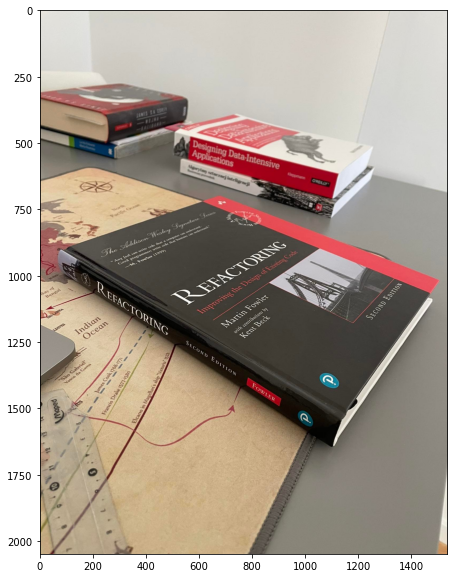

In [5]:
# image
im = cv2.imread("./book_pic1.jpg")
size = im.shape
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

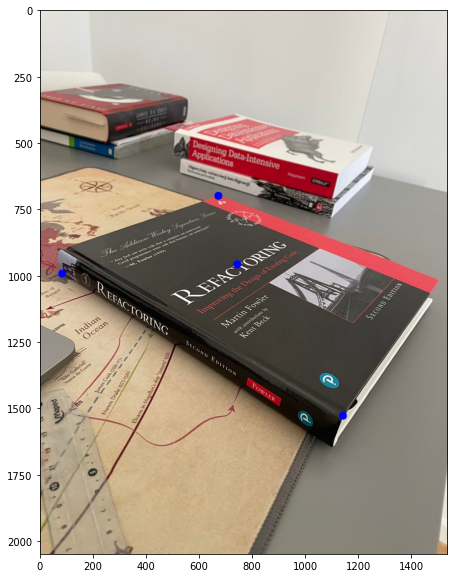

In [6]:
# 2d image points
image_points = np.array([
    (742.0, 957.0),    # letter T in 'Refactoring'
    (671.0, 699.0),    # front top right corner
    (1140.0, 1527.0),  # front bottom left corner
    (83.0, 992.0)      # back top left corner
])

for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 15, (255,0,0), -1)
    
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# camera matrix
focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
    [[focal_length, 0, center[0]],
    [0, focal_length, center[1]],
    [0, 0, 1]], dtype = "double"
)

print("Camera Matrix :\n {0}".format(camera_matrix) )

Camera Matrix :
 [[1.536e+03 0.000e+00 7.680e+02]
 [0.000e+00 1.536e+03 1.024e+03]
 [0.000e+00 0.000e+00 1.000e+00]]


In [8]:
# PnP
dist_coeffs = np.zeros((4,1)) # no lens distortion
(success, rotation_vector, translation_vector) = cv2.solvePnP(model_4_points, 
                                                              image_points, 
                                                              camera_matrix, 
                                                              dist_coeffs, 
                                                              flags=cv2.SOLVEPNP_EPNP)
                                                              # best fit = cv2.SOLVEPNP_EPNP
print("Rotation Vector:\n {0}".format(rotation_vector))
print("Translation Vector:\n {0}".format(translation_vector))

Rotation Vector:
 [[ 0.86498532]
 [ 0.94434987]
 [-0.62215506]]
Translation Vector:
 [[ 12.53773262]
 [ 23.95775524]
 [251.77986497]]


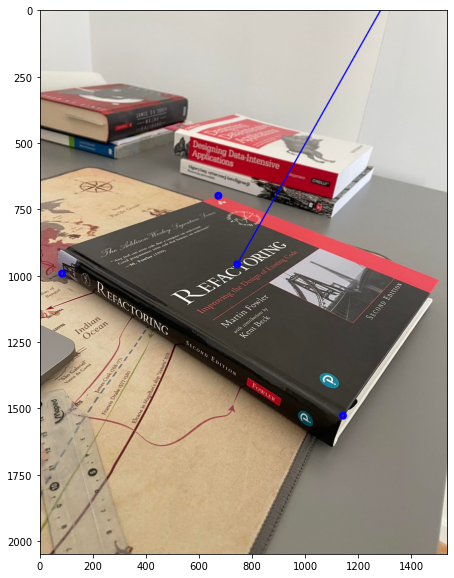

In [9]:
# project a 3D point (0, 0, 1000.0) onto the image plane.
def draw_axis(rotation_vector, translation_vector, camera_matrix, dist_coeffs, image_points):
    (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), 
                                                     rotation_vector, 
                                                     translation_vector, 
                                                     camera_matrix, 
                                                     dist_coeffs)

    for p in image_points:
        cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)


    p1 = (int(image_points[0][0]), int(image_points[0][1]))
    p2 = (int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

    cv2.line(im, p1, p2, (255,0,0), 3)

    # Display image
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

draw_axis(rotation_vector, translation_vector, camera_matrix, dist_coeffs, image_points)
plt.show()

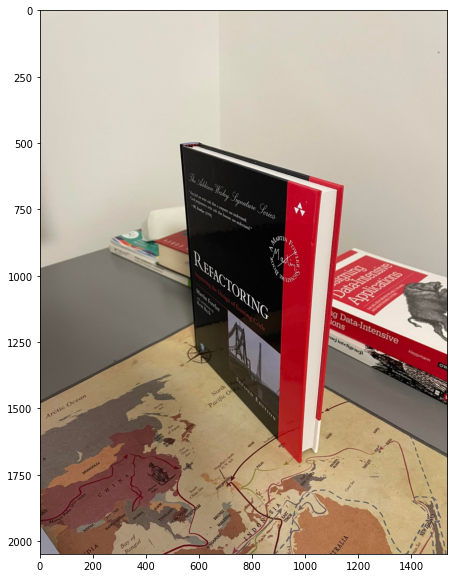

In [10]:
# another example
im = cv2.imread("./book_pic2.jpg")
size = im.shape
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

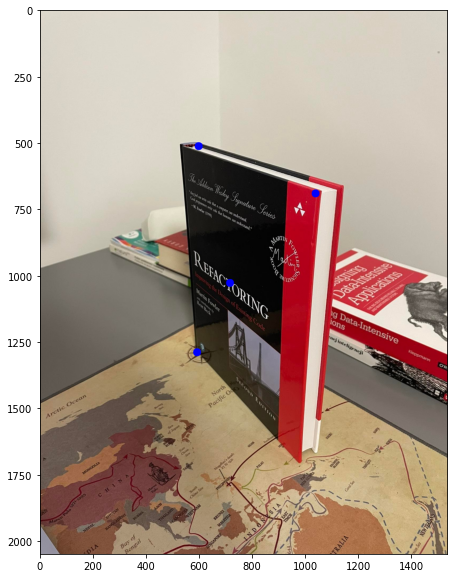

In [11]:
# another example:
image_points = np.array([
    (715.0, 1027.0),    # letter T in 'Refactoring'
    (1037.0, 690.0),    # front top right corner
    (591.0, 1288.0),    # front bottom left corner
    (597.0, 512.0)      # back top left corner
])

for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 15, (255,0,0), -1)
    
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

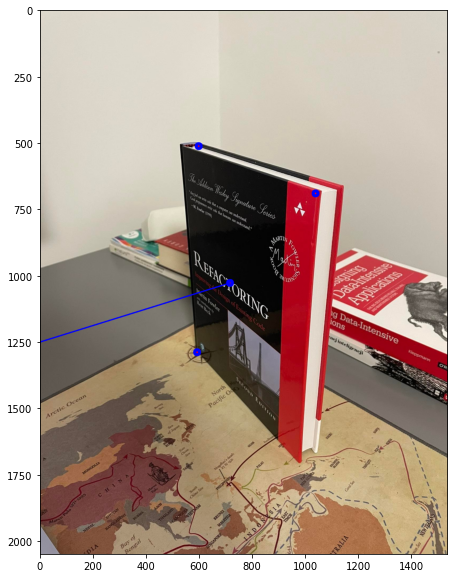

In [12]:
dist_coeffs = np.zeros((4,1)) # no lens distortion
(success, rotation_vector, translation_vector) = cv2.solvePnP(model_4_points, 
                                                              image_points, 
                                                              camera_matrix, 
                                                              dist_coeffs, 
                                                              flags=cv2.SOLVEPNP_EPNP)

draw_axis(rotation_vector, translation_vector, camera_matrix, dist_coeffs, image_points)
plt.show()